In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import sklearn.preprocessing

In [2]:
# import all stock prices 
df = pd.read_csv("NASDAQ_Composite.csv", index_col = 0)
df.head()

,IXIC.Open,IXIC.High,IXIC.Low,IXIC.Close,IXIC.Volume,IXIC.Adjusted
TIMESTAMP,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,1.931380e+09,2308.419922
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2.367860e+09,2308.709961
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2.253340e+09,2301.090088
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2.270050e+09,2300.050049
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2.145390e+09,2317.169922


In [3]:
df.describe()

,IXIC.Open,IXIC.High,IXIC.Low,IXIC.Close,IXIC.Volume,IXIC.Adjusted
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.000000
mean,4741.647273,4766.420162,4714.043359,4742.476513,1.964577e+09,4742.476513
std,1877.365514,1885.525754,1867.997740,1877.282870,3.977521e+08,1877.282870
min,2099.659912,2110.659912,2061.139893,2091.790039,1.494100e+08,2091.790039
25%,2973.875000,2990.934936,2959.095093,2976.155029,1.736800e+09,2976.155029
50%,4623.770020,4651.899902,4570.229980,4620.370117,1.913230e+09,4620.370117
75%,6229.260009,6255.950195,6200.430175,6227.930175,2.141375e+09,6227.930175
max,9049.469727,9052.000000,8987.320313,9022.389648,4.553600e+09,9022.389648


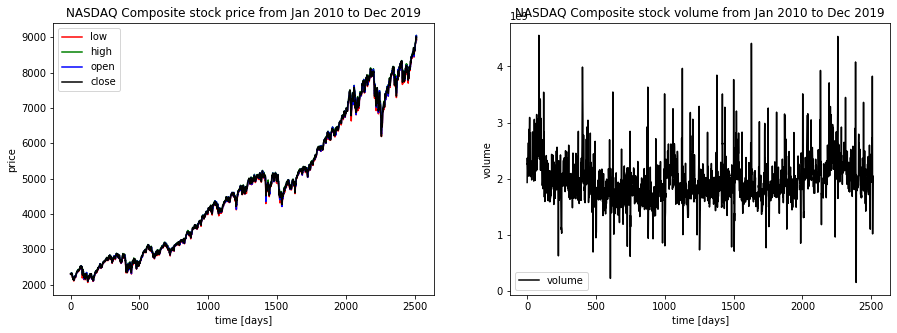

In [4]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df['IXIC.Low'].values, color='red', label='low')
plt.plot(df['IXIC.High'].values, color='green', label='high')
plt.plot(df['IXIC.Open'].values, color='blue', label='open')
plt.plot(df['IXIC.Close'].values, color='black', label='close')
plt.title('NASDAQ Composite stock price from Jan 2010 to Dec 2019')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')


plt.subplot(1,2,2);
plt.plot(df['IXIC.Volume'].values, color='black', label='volume')
plt.title('NASDAQ Composite stock volume from Jan 2010 to Dec 2019')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')

In [5]:
# Drop the volumn
df_stock = df.copy()
df_stock.drop(['IXIC.Volume'],1, inplace=True)

# Normalize stock for min-max normalization of stock
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
df_stock['open'] = min_max_scaler.fit_transform(df_stock['IXIC.Open'].values.reshape(-1,1))
df_stock['high'] = min_max_scaler.fit_transform(df_stock['IXIC.High'].values.reshape(-1,1))
df_stock['low'] = min_max_scaler.fit_transform(df_stock['IXIC.Low'].values.reshape(-1,1))
df_stock['close'] = min_max_scaler.fit_transform(df_stock['IXIC.Close'].values.reshape(-1,1))

# Only keep normalized data
df_stock.drop(['IXIC.Open', 'IXIC.High', 'IXIC.Low', 'IXIC.Close', 'IXIC.Adjusted'], 1, inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

df_stock.columns.values =  ['open', 'high', 'low', 'close']


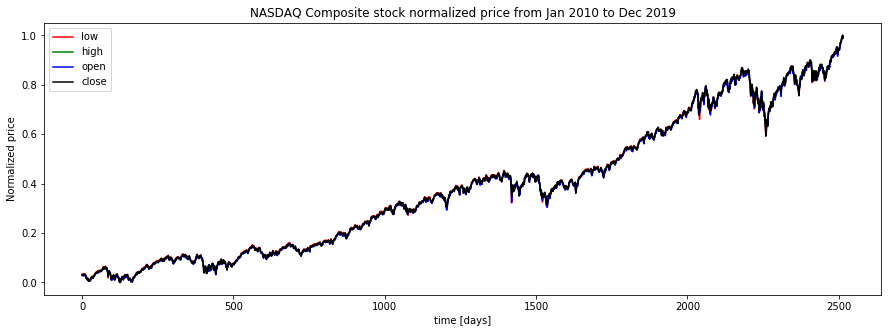

In [6]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock.low.values, color='red', label='low')
plt.plot(df_stock.high.values, color='green', label='high')
plt.plot(df_stock.open.values, color='blue', label='open')
plt.plot(df_stock.close.values, color='black', label='close')
plt.title('NASDAQ Composite stock normalized price from Jan 2010 to Dec 2019')
plt.xlabel('time [days]')
plt.ylabel('Normalized price')
plt.legend(loc='best')
plt.show()

In [7]:
# Create train, test and valid data
df_train = df_stock['2010-01-01':'2018-12-31']
df_test = df_stock['2019-01-01':'2019-12-31']
print('df_train.shape = ',df_train.shape)
print('df_test.shape = ',df_test.shape)

df_train.shape =  (2264, 4)
df_test.shape =  (251, 4)


In [8]:
# Create sequence data
# use previous 20 days' data to predict price in 1 days
lookback = 20  
lookahead = 1

train = df_train.values
x_train = np.array([train[i:i+lookback].copy() for i in range(len(train)-lookback-lookahead)])
y_train = np.array([train[i+lookback+lookahead-1,1] for i in range(len(train)-lookback-lookahead)])

test = df_test.values
x_test = np.array([test[i:i+lookback].copy() for i in range(len(test)-lookback-lookahead)])
y_test = np.array([test[i+lookback+lookahead-1,1] for i in range(len(test)-lookback-lookahead)])

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2243, 20, 4)
y_train.shape =  (2243,)
x_test.shape =  (230, 20, 4)
y_test.shape =  (230,)


In [9]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers

np.random.seed(4)

lstm_input = Input(shape=(lookback, x_train.shape[2]), name='lstm_input')
x = LSTM(units=64, return_sequences=False, return_state=False)(lstm_input)  
x = Dropout(0.2)(x)
x = Dense(units=32, activation='relu')(x)
output = Dense(1, activation='linear')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

weights = model.get_weights()  # needed to reset the model 

model.summary()

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      (None, 20, 4)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 19,777
Trainable params: 19,777
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(x_train, y_train, epochs=80, verbose=0)

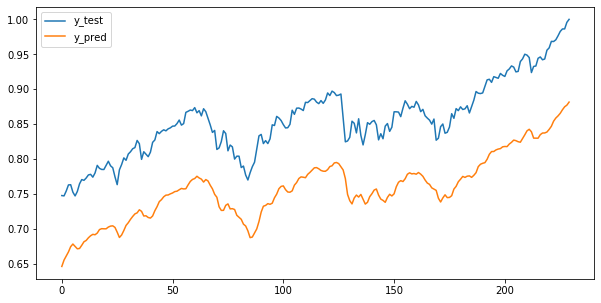

In [11]:
y_pred = model.predict(x_test)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(len(y_test)), y_test, label='y_test')
ax.plot(range(len(y_test)), y_pred, label='y_pred')
ax.legend(loc='best')

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-2.390775027384101

In [13]:
num_right = (np.sign(y_test) == np.sign(y_pred).squeeze()).sum()
num_right/len(y_test)

1.0